Verinin çekilmesi

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [57]:
from pandas import read_csv
data = read_csv('loan_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Sütunlar ve bunlarla ilgili bilgilerin kontrol edilmesi.

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


Sütunlardaki boş değer sayılarının kontrol edilmesi.

In [59]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Sütunlardaki boş değerlerin fazlalığa göre doldurulması ve boş değerlerden kurtulma işlemi.

In [60]:
# Gender sütunundaki eksik verileri doldurulması
gender_counts = data['Gender'].value_counts() # Cinsiyetlerin sayıları
most_frequent_gender = gender_counts.idxmax() # En çok tekrar eden cinsiyet
print('En çok tekrar eden gender:', most_frequent_gender)
data.fillna({'Gender': most_frequent_gender}, inplace=True) # Eksik verileri en çok tekrar eden cinsiyet ile doldurması

# Dependents sütunundaki eksik verileri doldurulması
dependents_counts = data['Dependents'].value_counts() # Dependents sayıları
most_frequent_dependents = dependents_counts.idxmax() # En çok tekrar eden dependents
print('En çok tekrar eden dependents:', most_frequent_dependents)
data.fillna({'Dependents': most_frequent_dependents}, inplace=True) # Eksik verileri en çok tekrar eden dependents ile doldurması

# Self_Employed sütunundaki eksik verileri doldurulması
self_employed_counts = data['Self_Employed'].value_counts() # Self_Employed sayıları
most_frequent_self_employed = self_employed_counts.idxmax() # En çok tekrar eden Self_Employed
print('En çok tekrar eden self_employed:', most_frequent_self_employed)
data.fillna({'Self_Employed': most_frequent_self_employed}, inplace=True) # Eksik verileri en çok tekrar eden Self_Employed ile doldurması

# Loan_Amount_Term sütunundaki eksik verileri doldurulması
loan_amount_term_counts = data['Loan_Amount_Term'].value_counts() # Loan_Amount_Term sayıları
most_frequent_loan_amount_term = loan_amount_term_counts.idxmax() # En çok tekrar eden Loan_Amount_Term
print('En çok tekrar eden loan_amount_term:', most_frequent_loan_amount_term)
data.fillna({'Loan_Amount_Term': most_frequent_loan_amount_term}, inplace=True) # Eksik verileri en çok tekrar eden Loan_Amount_Term ile doldurması

# Credit_History sütunundaki eksik verileri doldurulması
credit_history_counts = data['Credit_History'].value_counts() # Credit_History sayıları
most_frequent_credit_history = credit_history_counts.idxmax() # En çok tekrar eden Credit_History
print('En çok tekrar eden credit_history:', most_frequent_credit_history)
data.fillna({'Credit_History': most_frequent_credit_history}, inplace=True) # Eksik verileri en çok tekrar eden Credit_History ile doldurması


En çok tekrar eden gender: Male
En çok tekrar eden dependents: 0
En çok tekrar eden self_employed: No
En çok tekrar eden loan_amount_term: 360.0
En çok tekrar eden credit_history: 1.0


Gereksiz sütunlarun silinmesi

In [61]:
data.drop(columns=['Loan_ID'], inplace=True) # Loan_ID sütununu silmesi

Sütunların kontrolü

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


Cinsiyete göre kredi onaylanma durumu

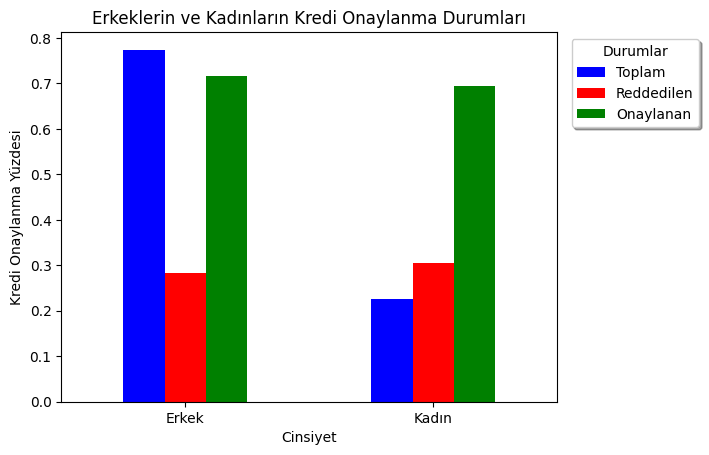

In [186]:
gender_loan_status_counts = data.groupby(['Gender', 'Loan_Status']).size().unstack()

# Yüzdelerin hesaplanması
gender_counts_percent = gender_counts / gender_counts.sum()
gender_loan_status_counts_percent = gender_loan_status_counts.div(gender_loan_status_counts.sum(axis=1), axis=0)

combined_counts = pd.concat([gender_counts_percent, gender_loan_status_counts_percent], axis=1)

combined_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel('Cinsiyet')
plt.ylabel('Kredi Onaylanma Yüzdesi')
plt.title('Erkeklerin ve Kadınların Kredi Onaylanma Durumları')
plt.legend(['Toplam', 'Reddedilen', 'Onaylanan'], bbox_to_anchor=(1.3, 1), ncol=1, title='Durumlar', shadow=True)
plt.xticks(ticks=[0,1], rotation=0, labels=['Erkek', 'Kadın'])
plt.show()

Medeni Duruma göre kredi onaylanma durumu

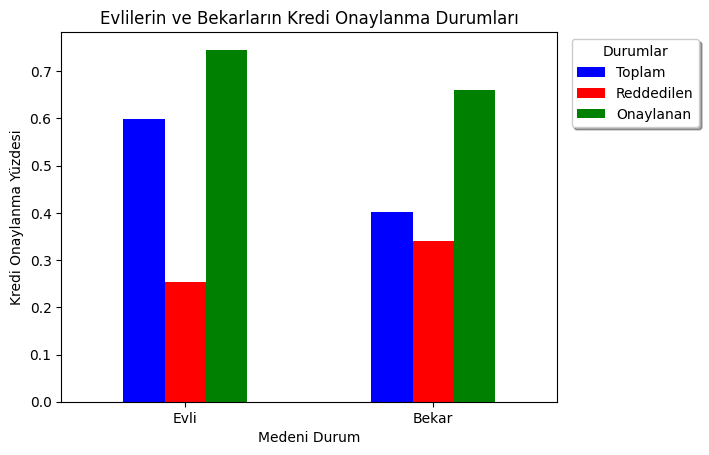

In [184]:
married_loan_status_counts = data.groupby(['Married', 'Loan_Status']).size().unstack()

# Yüzdelerin hesaplanması
married_counts = data['Married'].value_counts()
married_counts_percent = married_counts / married_counts.sum()
married_loan_status_counts_percent = married_loan_status_counts.div(married_loan_status_counts.sum(axis=1), axis=0)

combined_counts = pd.concat([married_counts_percent, married_loan_status_counts_percent], axis=1)

combined_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel('Medeni Durum')
plt.ylabel('Kredi Onaylanma Yüzdesi')
plt.title('Evlilerin ve Bekarların Kredi Onaylanma Durumları')
plt.legend(['Toplam', 'Reddedilen', 'Onaylanan'], bbox_to_anchor=(1.3, 1), ncol=1, title='Durumlar', shadow=True)
plt.xticks(ticks=[0,1], rotation=0, labels=['Evli', 'Bekar'])
plt.show()

Eğitime göre kredi onaylanma durumu

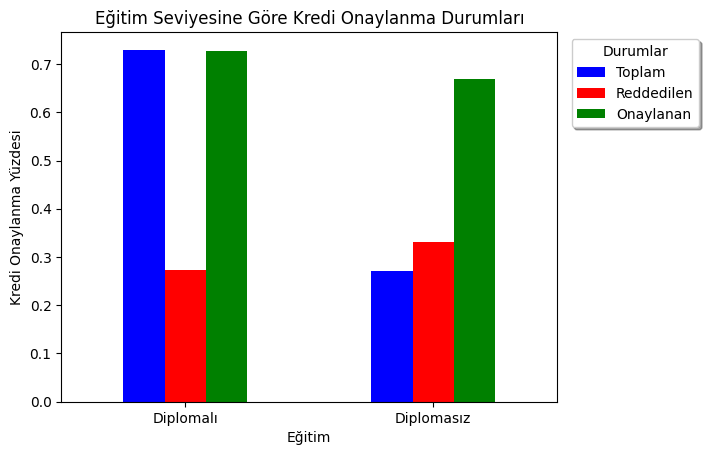

In [182]:
education_loan_status_counts = data.groupby(['Education', 'Loan_Status']).size().unstack()

# Yüzdelerin hesaplanması
education_counts = data['Education'].value_counts()
education_counts_percent = education_counts / education_counts.sum()
education_loan_status_counts_percent = education_loan_status_counts.div(education_loan_status_counts.sum(axis=1), axis=0)

combined_counts = pd.concat([education_counts_percent, education_loan_status_counts_percent], axis=1)

combined_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel('Eğitim')
plt.ylabel('Kredi Onaylanma Yüzdesi')
plt.title('Eğitim Seviyesine Göre Kredi Onaylanma Durumları')
plt.legend(['Toplam', 'Reddedilen', 'Onaylanan'], bbox_to_anchor=(1.3, 1), ncol=1, title='Durumlar', shadow=True)
plt.xticks(ticks=[0,1], rotation=0, labels=['Diplomalı', 'Diplomasız'])
plt.show()

Serbest Mesleğe göre kredi onaylanma durumu

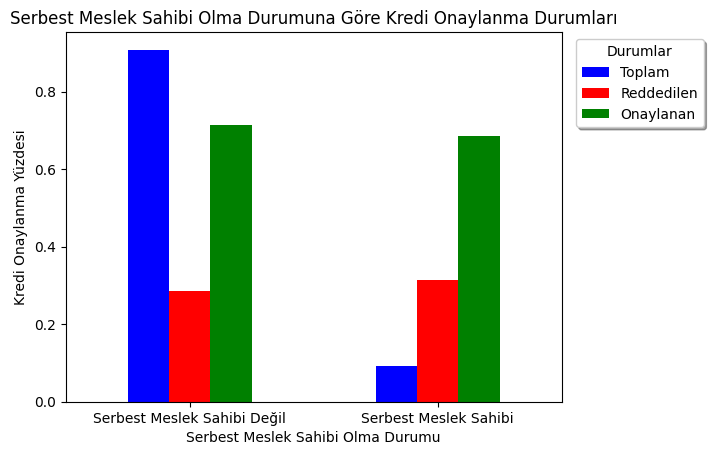

In [335]:
self_employed_loan_status_counts = data.groupby(['Self_Employed', 'Loan_Status']).size().unstack()

# Yüzdelerin hesaplanması
self_employed_counts = data['Self_Employed'].value_counts()
self_employed_counts_percent = self_employed_counts / self_employed_counts.sum()
self_employed_loan_status_counts_percent = self_employed_loan_status_counts.div(self_employed_loan_status_counts.sum(axis=1), axis=0)

combined_counts = pd.concat([self_employed_counts_percent, self_employed_loan_status_counts_percent], axis=1)

combined_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel('Serbest Meslek Sahibi Olma Durumu')
plt.ylabel('Kredi Onaylanma Yüzdesi')
plt.title('Serbest Meslek Sahibi Olma Durumuna Göre Kredi Onaylanma Durumları')
plt.legend(['Toplam', 'Reddedilen', 'Onaylanan'], bbox_to_anchor=(1.3, 1), ncol=1, title='Durumlar', shadow=True)
plt.xticks(ticks=[0,1], rotation=0, labels=['Serbest Meslek Sahibi Değil', 'Serbest Meslek Sahibi'])
plt.show()

Başvuru Sahibinin Gelirine Göre Kredi Onaylanma Durumu

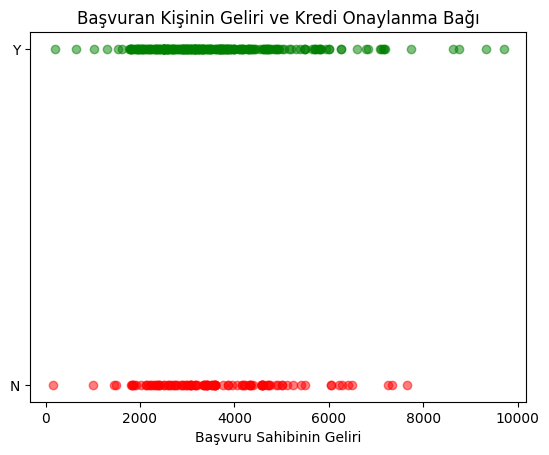

In [368]:
# Grafik oluşturma
for status in data["Loan_Status"].unique():
    plt.scatter(data[data["Loan_Status"] == status]["ApplicantIncome"], 
                data[data["Loan_Status"] == status]["Loan_Status"], label=status, alpha=0.5, c=['red', 'green'][status == 'Y'])

# Grafik özelleştirme
plt.title("Başvuran Kişinin Geliri ve Kredi Onaylanma Bağı")
plt.xlabel("Başvuru Sahibinin Geliri")
plt.show()

Başvuru Sahibi Gelirine Göre Onaylanan Kredi Miktarları

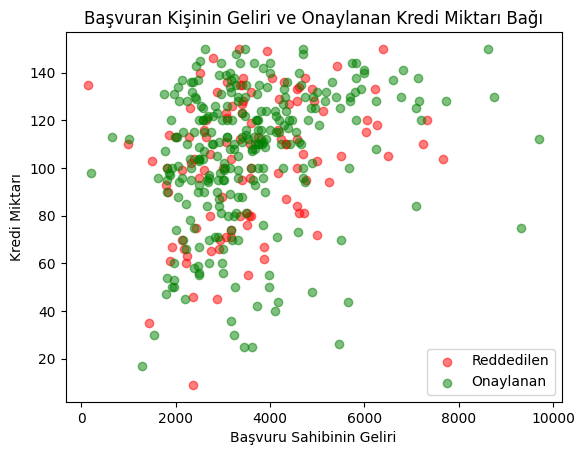

In [369]:
for status in data["Loan_Status"].unique():
    plt.scatter(data[data["Loan_Status"] == status]["ApplicantIncome"], 
                data[data["Loan_Status"] == status]["LoanAmount"], label=status, alpha=0.5, c=['red', 'green'][status == 'Y'])

plt.title("Başvuran Kişinin Geliri ve Onaylanan Kredi Miktarı Bağı")
plt.xlabel("Başvuru Sahibinin Geliri")
plt.ylabel("Kredi Miktarı")
plt.legend(labels = ['Reddedilen', 'Onaylanan'])
plt.show()

Ortak Başvuru Sahibi Gelirine Göre Kredi Onaylanma Durumu

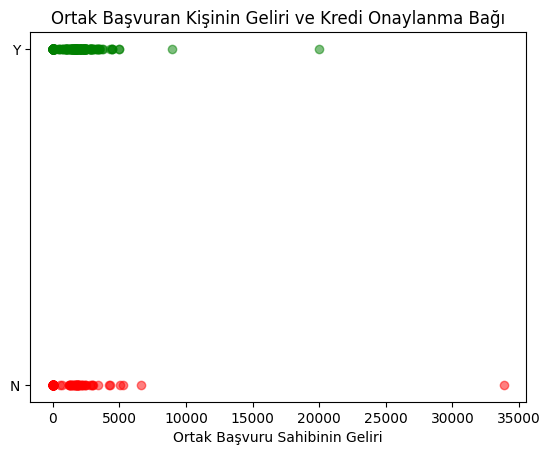

In [370]:
for status in data["Loan_Status"].unique():
    plt.scatter(data[data["Loan_Status"] == status]["CoapplicantIncome"], 
                data[data["Loan_Status"] == status]["Loan_Status"], label=status, alpha=0.5, c=['red', 'green'][status == 'Y'])

plt.title("Ortak Başvuran Kişinin Geliri ve Kredi Onaylanma Bağı")
plt.xlabel("Ortak Başvuru Sahibinin Geliri")
plt.show()

Ortak Başvuru Sahibinin Gelirine Göre Onaylanan Kredi Miktarları

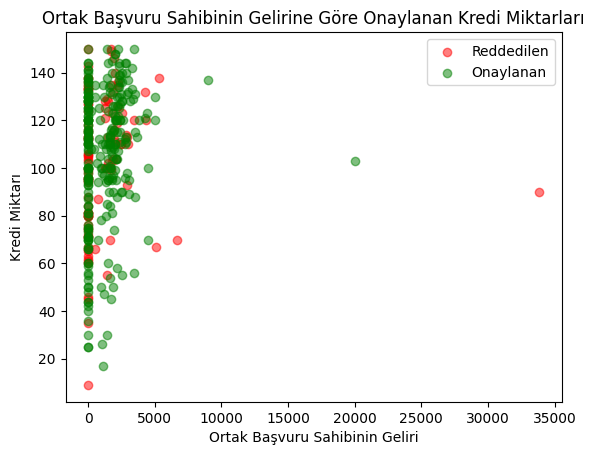

In [371]:
for status in data["Loan_Status"].unique():
    plt.scatter(data[data["Loan_Status"] == status]["CoapplicantIncome"], 
                data[data["Loan_Status"] == status]["LoanAmount"], label=status, alpha=0.5, c=['red', 'green'][status == 'Y'])

plt.title("Ortak Başvuru Sahibinin Gelirine Göre Onaylanan Kredi Miktarları")
plt.xlabel("Ortak Başvuru Sahibinin Geliri")
plt.ylabel("Kredi Miktarı")
plt.legend(labels = ['Reddedilen', 'Onaylanan'])
plt.show()

Kredi Miktarına Göre Kredinin onaylanması Durumu

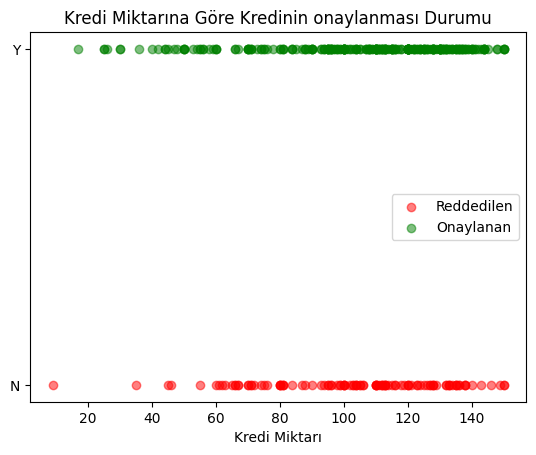

In [375]:
for status in data["Loan_Status"].unique():
    plt.scatter(data[data["Loan_Status"] == status]["LoanAmount"], 
                data[data["Loan_Status"] == status]["Loan_Status"], label=status, alpha=0.5, c=['red', 'green'][status == 'Y'])

plt.title("Kredi Miktarına Göre Kredinin onaylanması Durumu")
plt.xlabel("Kredi Miktarı")
plt.legend(labels = ['Reddedilen', 'Onaylanan'])
plt.show()

Kredi Tutarı Vadesine Göre Kredi Onaylanma Durumu

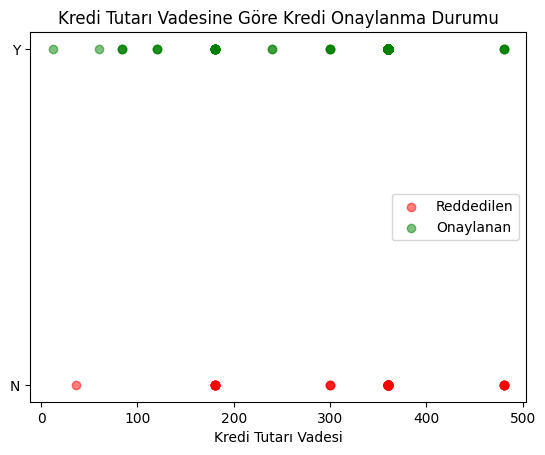

In [376]:
for status in data["Loan_Status"].unique():
    plt.scatter(data[data["Loan_Status"] == status]["Loan_Amount_Term"], 
                data[data["Loan_Status"] == status]["Loan_Status"], label=status, alpha=0.5, c=['red', 'green'][status == 'Y'])

plt.title("Kredi Tutarı Vadesine Göre Kredi Onaylanma Durumu")
plt.xlabel("Kredi Tutarı Vadesi")
plt.legend(labels = ['Reddedilen', 'Onaylanan'])
plt.show()

Mülkiyet Alanına Göre Kredi Onaylanma Oranı

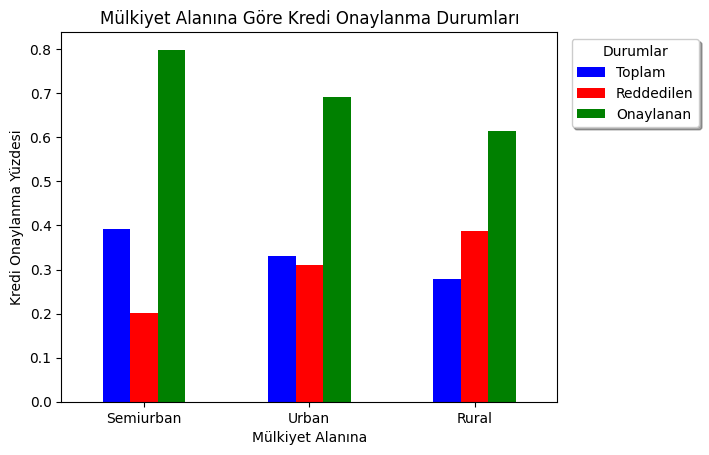

In [377]:
property_area_loan_status_counts = data.groupby(['Property_Area', 'Loan_Status']).size().unstack()

# Yüzdelerin hesaplanması
property_area_counts = data['Property_Area'].value_counts()
property_area_counts_percent = property_area_counts / property_area_counts.sum()
property_area_loan_status_counts_percent = property_area_loan_status_counts.div(property_area_loan_status_counts.sum(axis=1), axis=0)

combined_counts = pd.concat([property_area_counts_percent, property_area_loan_status_counts_percent], axis=1)

combined_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel('Mülkiyet Alanına')
plt.ylabel('Kredi Onaylanma Yüzdesi')
plt.title('Mülkiyet Alanına Göre Kredi Onaylanma Durumları')
plt.legend(['Toplam', 'Reddedilen', 'Onaylanan'], bbox_to_anchor=(1.3, 1), ncol=1, title='Durumlar', shadow=True)
plt.xticks(rotation=0)
plt.show()